<a href="https://colab.research.google.com/github/Abhinav-abhi/TSSpython_20b090002/blob/main/Taxifairprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od

In [4]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [5]:
%%time
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: ··········


100%|██████████| 1.56G/1.56G [00:12<00:00, 132MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction
CPU times: user 49.9 s, sys: 13.8 s, total: 1min 3s
Wall time: 3min 12s


View data set files

In [6]:
data_dir = './new-york-city-taxi-fare-prediction'

In [7]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Jul 20 20:00 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Jul 20 20:00 sample_submission.csv
-rw-r--r-- 1 root root 960K Jul 20 20:00 test.csv
-rw-r--r-- 1 root root 5.4G Jul 20 20:01 train.csv


In [8]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [9]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [10]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [11]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [12]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [13]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.


In [14]:
import pandas as pd
import random

In [15]:
# Change this
sample_frac = 0.01

In [16]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

CPU times: user 2min 11s, sys: 3.16 s, total: 2min 14s
Wall time: 2min 19s


In [17]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


### Load Test Set

For the test set, we'll simply provide the data types.

In [18]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [19]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


##  Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization


### Training Set

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [21]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934257,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255058,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [22]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0 
- `passenger_count` ranges from 0 to 208 
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.

### Test Set

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [24]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [25]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

##  Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [28]:
len(train_df), len(val_df)

(441960, 110490)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [29]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [30]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [31]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [32]:
target_col = 'fare_amount'

#### Training

In [33]:
train_inputs = train_df[input_cols]

In [34]:
train_targets = train_df[target_col]

In [35]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [36]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

#### Validation

In [37]:
val_inputs = val_df[input_cols]

In [38]:
val_targets = val_df[target_col]

In [39]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1.0
149839,-73.977386,40.738335,-73.976143,40.751204,1.0
515867,-73.983910,40.749470,-73.787170,40.646643,1.0
90307,-73.790794,40.643463,-73.972252,40.690180,1.0
287032,-73.976593,40.761944,-73.991463,40.750309,2.0
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750020,3.0
19482,-73.986725,40.755920,-73.985855,40.731170,1.0
186063,0.000000,0.000000,0.000000,0.000000,1.0
382260,-73.980057,40.760334,-73.872589,40.774298,1.0


In [40]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

#### Test

In [41]:
test_inputs = test_df[input_cols]

In [42]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


##  Train Hardcoded & Baseline Models

- Hardcoded model: always predict average fare
- Baseline model: Linear regression 

For evaluation the dataset uses RMSE error: 
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [43]:
import numpy as np

In [44]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [45]:
mean_model = MeanRegressor()

In [46]:
mean_model.fit(train_inputs, train_targets)

In [47]:
mean_model.mean

11.354714

In [48]:
train_preds = mean_model.predict(train_inputs)

In [49]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [50]:
val_preds = mean_model.predict(val_inputs)

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [53]:
train_rmse

9.789782

In [54]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

In [55]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

In [56]:
val_rmse

9.899954

### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
linreg_model = LinearRegression()

In [59]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [60]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.54623682, 11.28460949, 11.28413941, ..., 11.45891673,
       11.28428005, 11.28444733])

In [61]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.28432795, 11.28449549, 11.28478054, ..., 11.80449938,
       11.28443343, 11.28413233])

In [62]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

9.78863266989743

In [63]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.898088220645102

The linear regression model is off by $9.898, which isn't much better than simply predicting the average. 

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

In [64]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [65]:
test_preds = linreg_model.predict(test_inputs)

In [66]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [67]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [68]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [69]:
generate_submission(test_preds, 'linreg_submission.csv')

![](https://i.imgur.com/DfCLCrE.png)

##  Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks


### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour


In [70]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [71]:
add_dateparts(train_df, 'pickup_datetime')

In [72]:
add_dateparts(val_df, 'pickup_datetime')

In [73]:
add_dateparts(test_df, 'pickup_datetime')

In [74]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


### Add Distance Between Pickup and Drop

We can use the haversine distance: 
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [76]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [77]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [78]:
%%time
add_trip_distance(train_df)

CPU times: user 62.5 ms, sys: 10.9 ms, total: 73.4 ms
Wall time: 90.6 ms


In [79]:
add_trip_distance(val_df)

In [80]:
add_trip_distance(test_df)

In [81]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
33146,8.1,2011-08-23 19:30:00+00:00,-73.970451,40.761734,-73.975868,40.785518,1.0,2011,8,23,1,19,2.682206
261194,9.3,2011-11-10 11:06:00+00:00,-73.975311,40.728851,-73.963989,40.757100,1.0,2011,11,10,3,11,3.280694
462700,6.1,2011-06-08 14:05:49+00:00,-73.959656,40.771244,-73.968262,40.761807,1.0,2011,6,8,2,14,1.274447
483899,4.9,2011-06-04 02:15:57+00:00,-73.990265,40.735237,-73.982780,40.739323,2.0,2011,6,4,5,2,0.776768
221736,7.0,2009-04-05 21:14:19+00:00,-73.983345,40.721424,-73.989388,40.734524,2.0,2009,4,5,6,21,1.542183


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [82]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [83]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [84]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 405 ms, sys: 16.5 ms, total: 422 ms
Wall time: 443 ms


In [85]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
48405,16.1,2010-07-29 09:52:10+00:00,-73.984825,40.767197,-74.011879,40.713596,1.0,2010,7,29,3,9,6.376856,21.276887,13.572955,13.959836,8.382300,0.199736
329713,8.5,2014-12-16 02:14:00+00:00,-73.984955,40.727985,-73.998314,40.745282,1.0,2014,12,16,1,2,2.226889,21.858132,11.037355,16.082489,4.806878,3.760669
301740,13.5,2015-06-18 09:34:51+00:00,-73.967979,40.801338,-73.973312,40.762657,1.0,2015,6,18,3,9,4.321687,21.268104,8.506495,18.792586,2.045819,6.358781
472874,7.7,2011-10-25 13:01:00+00:00,-74.005714,40.736706,-73.987541,40.756957,2.0,2011,10,25,1,13,2.721281,21.829688,9.809346,17.439021,3.227207,5.276585
174804,12.0,2013-08-11 22:13:00+00:00,-73.950592,40.783371,-73.975410,40.747117,1.0,2013,8,11,6,22,4.537819,20.362788,9.154625,17.949328,3.731646,4.811381


### Remove Outliers and Invalid Data

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [86]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937865,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751764,193.147978,182.365206,191.412330,177.416092,178.902096
std,9.789793,11.795325,8.464263,12.398610,9.857420,1.344170,1.857024,3.434881,8.697374,1.950033,6.517710,371.299305,1223.614787,1226.672207,1228.515208,1228.388658,1228.487258
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305535,0.116385,0.129259,0.031095,0.009334
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212450,20.535191,8.350965,16.502844,2.169888,3.642498
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116230,21.202076,9.575570,18.016353,3.818017,5.559662
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879673,21.948262,11.122069,19.953306,6.071750,7.814534
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.444834,15057.674834,15074.642961,15074.714623,15077.613474,15072.109731


In [87]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6

In [88]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [89]:
train_df = remove_outliers(train_df)

In [90]:
val_df = remove_outliers(val_df)

### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.

You may also want to create differnt notebooks for EDA, feature engineering and model training.

In [91]:
train_df.to_parquet('train.parquet')

In [92]:
val_df.to_parquet('val.parquet')

In [93]:
test_df.to_parquet('test.parquet')

## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, SVM, KNN, Decision Tree models

### Split Inputs & Targets

In [94]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [95]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [96]:
target_col = 'fare_amount'

In [97]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [98]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [99]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models and generate test predictions

In [100]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

In [101]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

### Ridge Regression

In [102]:
from sklearn.linear_model import Ridge

In [103]:
model1 = Ridge(random_state=42)

In [104]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 111 ms, sys: 365 ms, total: 476 ms
Wall time: 823 ms


Ridge(random_state=42)

In [105]:
evaluate(model1)

(5.049312855022606,
 5.217863164084474,
 array([ 8.12926895,  4.11625204,  8.75052428, ..., 10.47189549,
         8.23053339, 10.58672574]),
 array([10.91970437,  6.20497332, 46.21797207, ...,  8.04644756,
        25.56873019,  8.45308844]))

In [106]:
predict_and_submit(model1, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.081831
1,2015-01-27 13:08:24.0000003,11.399684
2,2011-10-08 11:53:44.0000002,5.356914
3,2012-12-01 21:12:12.0000002,8.763991
4,2012-12-01 21:12:12.0000003,14.610180
...,...,...
9909,2015-05-10 12:37:51.0000002,9.025113
9910,2015-01-12 17:05:51.0000001,11.218273
9911,2015-04-19 20:44:15.0000001,47.926257
9912,2015-01-31 01:05:19.0000005,22.600176


![](https://i.imgur.com/aMAFpbH.png)

We were able to get to a position of around 1100

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [109]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 7min 40s, sys: 262 ms, total: 7min 40s
Wall time: 4min 1s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [110]:
evaluate(model2)

(3.5979272803236033,
 4.162992374769893,
 array([ 7.04561969,  9.16841263,  9.10837664, ..., 10.38572951,
         7.74169069, 10.38922928]),
 array([12.53333721,  6.14758144, 47.32745299, ...,  8.33103424,
        29.15652571,  8.2638333 ]))

In [111]:
predict_and_submit(model2, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.507307
1,2015-01-27 13:08:24.0000003,10.507307
2,2011-10-08 11:53:44.0000002,5.052405
3,2012-12-01 21:12:12.0000002,8.466582
4,2012-12-01 21:12:12.0000003,14.344346
...,...,...
9909,2015-05-10 12:37:51.0000002,8.835443
9910,2015-01-12 17:05:51.0000001,12.520002
9911,2015-04-19 20:44:15.0000001,55.266349
9912,2015-01-31 01:05:19.0000005,21.551546


![](https://i.imgur.com/jyMniFW.png)

This puts us at position 573 out of 1483 i.e. top 40%, which is already a really good score.


### Gradient Boosting

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [112]:
from xgboost import XGBRegressor

In [113]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [114]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: user 1min 36s, sys: 351 ms, total: 1min 37s
Wall time: 54.9 s


XGBRegressor(n_jobs=-1, objective='reg:squarederror', random_state=42)

In [115]:
evaluate(model3)

(3.8774352,
 4.2218766,
 array([ 6.784992,  9.058507,  9.647085, ..., 10.247599,  8.154806,
        10.189582], dtype=float32),
 array([12.4341135,  6.3510747, 47.74244  , ...,  8.108994 , 29.701588 ,
         8.555185 ], dtype=float32))

In [117]:
predict_and_submit(model3, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.225533
1,2015-01-27 13:08:24.0000003,10.585101
2,2011-10-08 11:53:44.0000002,5.101508
3,2012-12-01 21:12:12.0000002,8.199712
4,2012-12-01 21:12:12.0000003,14.573353
...,...,...
9909,2015-05-10 12:37:51.0000002,8.872132
9910,2015-01-12 17:05:51.0000001,11.904471
9911,2015-04-19 20:44:15.0000001,52.787849
9912,2015-01-31 01:05:19.0000005,21.513882


![](https://i.imgur.com/GIC08hz.png)

This submission isn't as good as the random forest, but there's scope for improvement with Hyperparameter tuning.

##  Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [118]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [119]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### No. of Trees

CPU times: user 13min 19s, sys: 1.31 s, total: 13min 20s
Wall time: 6min 52s


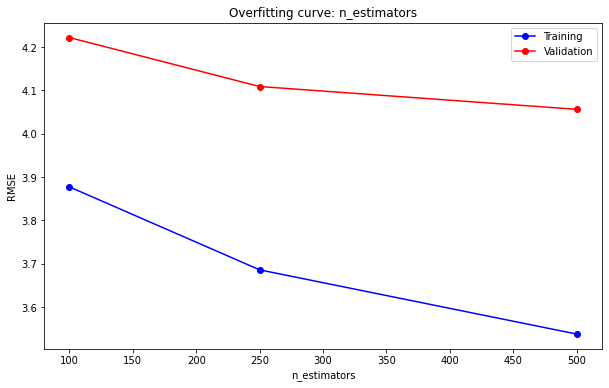

In [120]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [121]:
best_params['n_estimators'] = 250

CPU times: user 15min 30s, sys: 1.28 s, total: 15min 32s
Wall time: 7min 58s


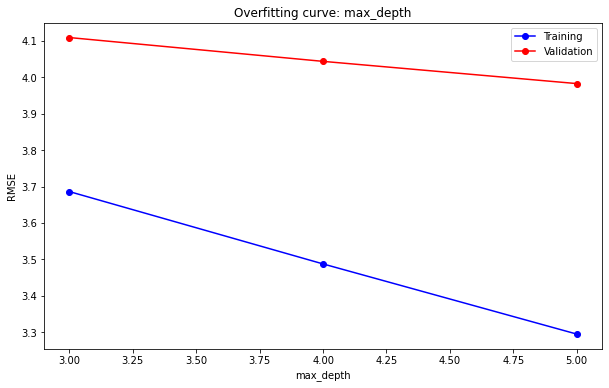

In [122]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Looks like a max depth of 5 is ideal.

CPU times: user 11min 30s, sys: 1.04 s, total: 11min 31s
Wall time: 5min 55s


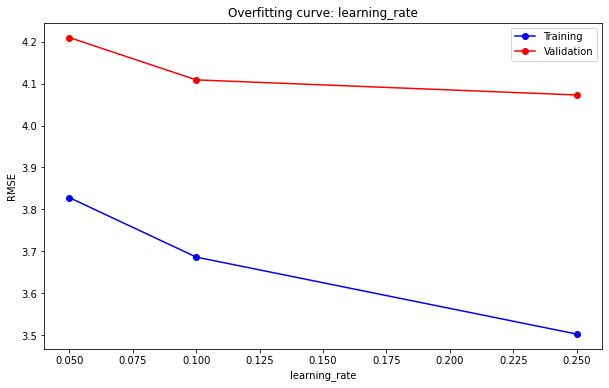

In [123]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

Seems like the best learning rate is 0.25.